In [1]:
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt

import my_package
from my_package.core.AC_v3 import AC_agent

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
memory_size = 100000
num_episodes = 300       # Numero di episodi di addestramento
batch_size = 64             # Dimensione del batch per l'aggiornamento delle reti
data_window = 50

env = gym.make("Pendulum-v1", render_mode="rgb_array") 
# env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array") 
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
low = env.action_space.low
high = env.action_space.high
agent = AC_agent(
    state_size=state_dim,
    action_size=action_dim,
    device=device,
    noise_type='param',
    buffer_size=memory_size,
    batch_size=batch_size,
    desired_distance=0.05,
)


reward_per_ep = np.zeros(num_episodes)
critic_loss_per_step = []
actor_loss_per_step = []

for episode in range(num_episodes):
    state, info = env.reset()
    agent.reset()
    total_reward = 0.0
    done = False
    first_reward_collected = False
    second_reward_collected = False
    while not done:
        action = agent.act(state)
        next_state, reward, terminated, truncated, info = env.step(2 * action.astype(np.float64))
        total_reward += reward

        agent.step(state, action, reward, next_state, terminated)
            
        state = next_state
        done = terminated or truncated
    
    reward_per_ep[episode] = total_reward
    if episode % data_window == 0 and episode != 0:
        ma_reward = np.mean(reward_per_ep[episode-data_window:episode])
        
        print(f"Ep {episode}/{num_episodes}, MA Reward: {ma_reward:.2f}") 


env.close()

Ep 50/300, MA Reward: -1417.38
Ep 100/300, MA Reward: -561.53
Ep 150/300, MA Reward: -148.55
Ep 200/300, MA Reward: -152.80
Ep 250/300, MA Reward: -174.49


In [8]:
env = gym.make("Pendulum-v1", render_mode="human") 
 
for episode in range(1):
    state, info = env.reset()
    agent.reset()
    total_reward = 0.0
    
    done = False
    while not done:
        action = 2 * agent.act(state, add_noise = False)
        next_state, reward, terminated, truncated, info = env.step(action.astype(np.float64))
        total_reward += reward

        agent.step(state, action, reward, next_state, terminated)

        
        state = next_state
        done = terminated or truncated
    print(total_reward)

env.close()

-128.35989612104848


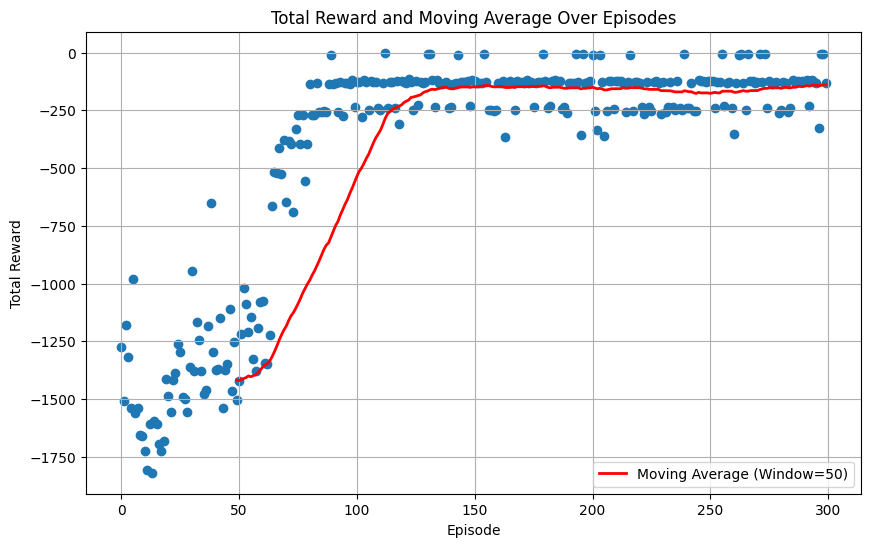

In [9]:
import matplotlib.pyplot as plt

""" Plot rewards """
window_size = 50
ma_reward = np.convolve(reward_per_ep, np.ones(window_size) / window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(reward_per_ep)), reward_per_ep)
plt.plot(np.arange(window_size - 1, len(reward_per_ep)), ma_reward, color='red', label=f'Moving Average (Window={window_size})', linewidth=2)
plt.title('Total Reward and Moving Average Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)
plt.show()


# """ Plot losses """
# window_size = 50
# ma_loss = np.convolve(critic_loss_per_step, np.ones(window_size) / window_size, mode='valid')
# plt.figure(figsize=(10, 6))
# plt.scatter(np.arange(len(critic_loss_per_step)), critic_loss_per_step)
# plt.plot(np.arange(window_size - 1, len(critic_loss_per_step)), ma_loss, color='red', label=f'Moving Average (Window={window_size})', linewidth=2)
# plt.title('Total Reward and Moving Average Over Episodes')
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.legend()
# plt.grid(True)
# plt.show()

# window_size = 50
# ma_loss = np.convolve(actor_loss_per_step, np.ones(window_size) / window_size, mode='valid')
# plt.figure(figsize=(10, 6))
# plt.scatter(np.arange(len(actor_loss_per_step)), actor_loss_per_step)
# plt.plot(np.arange(window_size - 1, len(actor_loss_per_step)), ma_loss, color='red', label=f'Moving Average (Window={window_size})', linewidth=2)
# plt.title('Total Reward and Moving Average Over Episodes')
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.legend()
# plt.grid(True)
# plt.show()
